## Engrgy Consumption forecasting with LSTM

- In this project I have trained RNN model to predict the energy consumption by home appliences

- The Dataset used in this project is available on UCI Machine learning libraby with following link 
https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- Dataset Description:

1. Appliances, energy consumption by Home appliances in Wh
2. lights, energy use of light fixtures in the house in Wh
3. T1, Temperature in kitchen area, in Celsius
4. RH_1, Humidity in kitchen area, in %
5. T2, Temperature in living room area, in Celsius
6. RH_2, Humidity in living room area, in %
7. T3, Temperature in laundry room area
8. RH_3, Humidity in laundry room area, in %
9. T4, Temperature in office room, in Celsius
10. RH_4, Humidity in office room, in %
11. T5, Temperature in bathroom, in Celsius
12. RH_5, Humidity in bathroom, in %
13. T6, Temperature outside the building (north side), in Celsius
14. RH_6, Humidity outside the building (north side), in %
15. T7, Temperature in ironing room , in Celsius
16. RH_7, Humidity in ironing room, in %
17. T8, Temperature in teenager room 2, in Celsius
18. RH_8, Humidity in teenager room 2, in %
19. T9, Temperature in parents room, in Celsius
20. RH_9, Humidity in parents room, in %
21. To, Temperature outside (from Chievres weather station), in Celsius
22. Pressure (from Chievres weather station), in mm Hg
23. RH_out, Humidity outside (from Chievres weather station), in %
24. Wind speed (from Chievres weather station), in m/s
25. Visibility (from Chievres weather station), in km
26. Tdewpoint (from Chievres weather station), Â°C
27. rv1, Random variable 1, nondimensional
28. rv2, Random variable 2, nondimensional

## 1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Importing Dataset

In [6]:
df = pd.read_csv('dataset - dataset.csv.csv')

In [8]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2022 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2022 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2022 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2022 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2022 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2022 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-2022 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-2022 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-2022 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


## 3.Exploratory Data Analysis

In [11]:
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M", errors='coerce')


**3.1 Checking Correlation between independent and dependent variables**

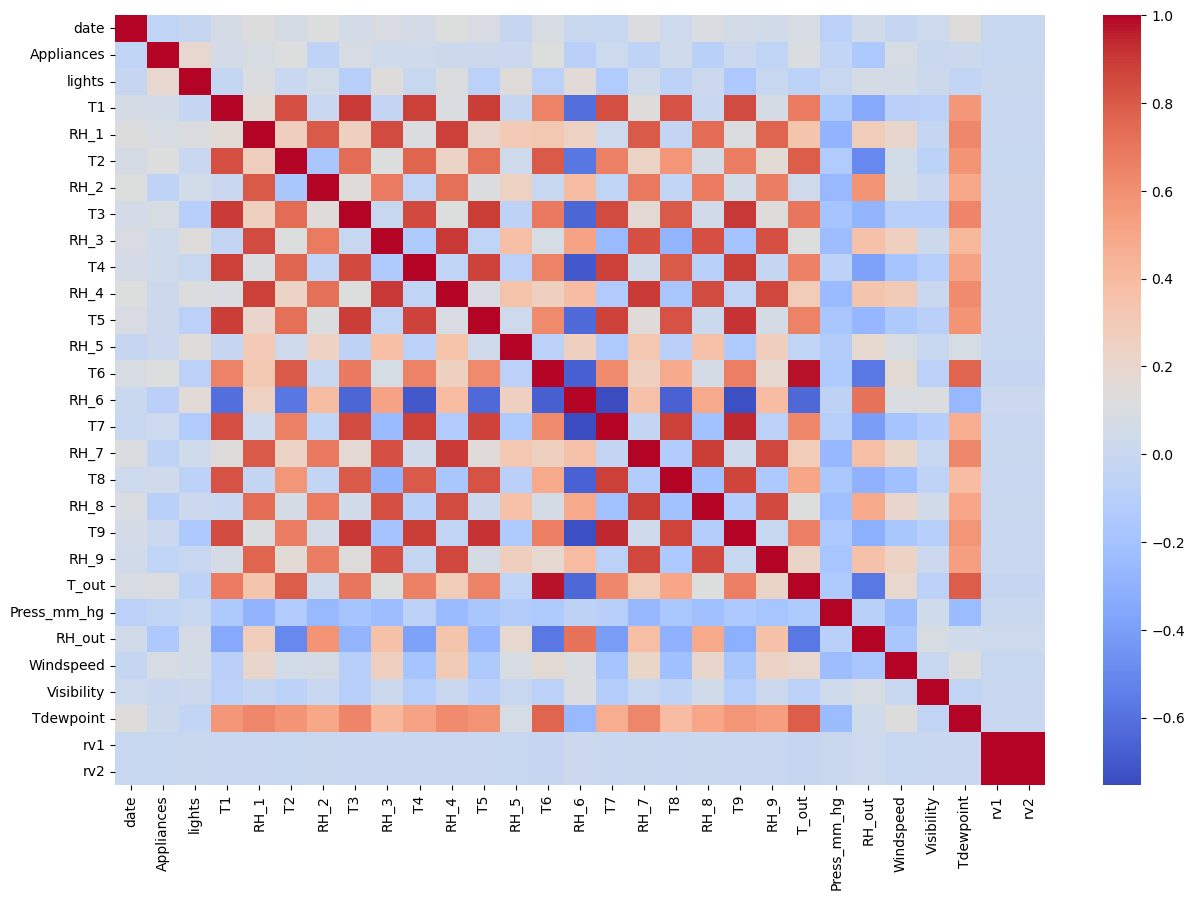

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

**Observation**
1. Temperature and Humidity values are highly correlated with each other respectively

2. Appliance value has neutral relation with other variables



**3.2 Checking Energy consumption with respect to time**

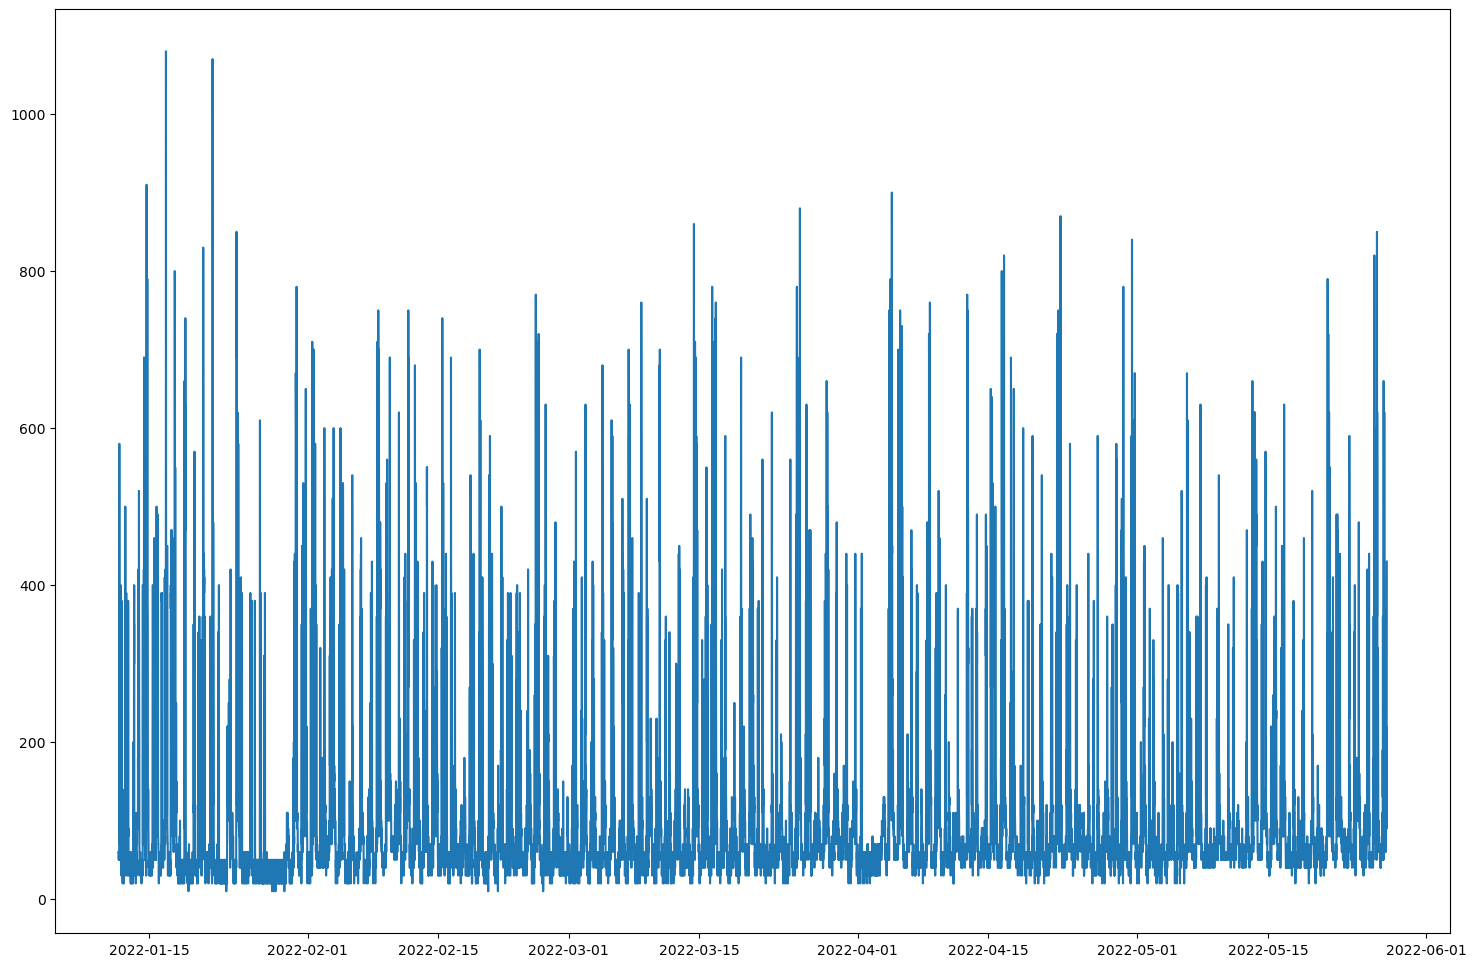

In [18]:
plt.figure(figsize=(18,12))
plt.plot(df.date,df.Appliances)
plt.show()

**Observation**

- There is seasonality in energy consumption with respect to time.
 
- Energy consumption shows periodic rise in value  

## 4.Data Preprocessing

**4.1 Defining dataframe with selective variables which don't have high correlation with each other**

In [23]:
df1 = df[['Appliances','T1', 'RH_1','Press_mm_hg', 'RH_out', 'Windspeed']]
df1.head()

,Appliances,T1,RH_1,Press_mm_hg,RH_out,Windspeed
0,60,19.89,47.596667,733.5,92.0,7.000000
1,60,19.89,46.693333,733.6,92.0,6.666667
2,50,19.89,46.300000,733.7,92.0,6.333333
3,50,19.89,46.066667,733.8,92.0,6.000000
4,60,19.89,46.333333,733.9,92.0,5.666667


**4.2 Scalling Datapoints with MinMaxScaler**

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [28]:
df1 = sc.fit_transform(df1)
df1

array([[0.04672897, 0.32734952, 0.56618659, 0.09767442, 0.89473684,
        0.5       ],
       [0.04672897, 0.32734952, 0.54132648, 0.1       , 0.89473684,
        0.47619048],
       [0.03738318, 0.32734952, 0.53050179, 0.10232558, 0.89473684,
        0.45238095],
       ...,
       [0.24299065, 0.91974657, 0.53866618, 0.60232558, 0.4254386 ,
        0.26190476],
       [0.38317757, 0.91974657, 0.54949087, 0.60232558, 0.42982456,
        0.27380952],
       [0.39252336, 0.91974657, 0.53875791, 0.60232558, 0.43421053,
        0.28571429]])

**4.2 Defining Independent and Target Variable**

In [31]:
X = df1
y = df1[:,0]

**4.3 Dividing the dataset into Training and Testing Dataset**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = False)

In [36]:
X_train.shape

(13814, 6)

In [38]:
X_test.shape

(5921, 6)

 ## 5.Creating a data structure 

**5.1 Importing TimeseriesGenerator**

In [42]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


**5.2 Using 280 Time steps with single sampling rate to prepare data structure**

In [45]:
Time_stamps = 280
features = 6

In [50]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [52]:
Train_set = TimeseriesGenerator(X_train, y_train,
                                length=Time_stamps, sampling_rate=1,
                                batch_size=32)

In [56]:
Test_set = TimeseriesGenerator(X_test, y_test,
                               length=Time_stamps, sampling_rate=1,
                               batch_size=32)

 ## 6.Building and Training the RNN

**6.1 Importing the Keras libraries and packages**

In [60]:
pip show tensorflow


Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\cialg\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


**6.2 Adding the LSTM layers and some Dropout regularisation**

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [78]:
## first layer of lstm
model = Sequential()
model.add(LSTM(130,input_shape = (Time_stamps, features),return_sequences= True))
model.add(Dropout(0.2))

## Second layer of lstm
model.add(LSTM(130,return_sequences= True))
model.add(Dropout(0.2))

## Third layer of lstm
model.add(LSTM(130,return_sequences= True))
model.add(Dropout(0.2))

## forth layer of lstm
model.add(LSTM(130))
model.add(Dropout(0.2))

model.add(Dense(1))



C:\Users\cialg\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 280, 130)       │        71,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 280, 130)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 280, 130)       │       135,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 280, 130)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 280, 130)       │       135,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 280, 130)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 130)            │       135,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 130)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           131 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 478,531 (1.83 MB)

 Trainable params: 478,531 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

**6.3 Compiling the RNN**

In [82]:
model.compile( optimizer='rmsprop', loss = 'mean_squared_error')

## 7.Model Fitting and Prediction 

**7.1 Fitting model on Train_Set and validating with Test_set**

In [88]:
model.fit(Train_set,epochs=15,validation_data= Test_set, shuffle= False)

Epoch 1/15


C:\Users\cialg\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


423/423 ━━━━━━━━━━━━━━━━━━━━ 565s 1s/step - loss: 0.0177 - val_loss: 0.0067
Epoch 2/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 393s 930ms/step - loss: 0.0108 - val_loss: 0.0066
Epoch 3/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 415s 981ms/step - loss: 0.0101 - val_loss: 0.0061
Epoch 4/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 415s 981ms/step - loss: 0.0098 - val_loss: 0.0058
Epoch 5/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 418s 988ms/step - loss: 0.0096 - val_loss: 0.0057
Epoch 6/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 429s 1s/step - loss: 0.0093 - val_loss: 0.0056
Epoch 7/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 407s 963ms/step - loss: 0.0088 - val_loss: 0.0053
Epoch 8/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 420s 992ms/step - loss: 0.0083 - val_loss: 0.0050
Epoch 9/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 414s 979ms/step - loss: 0.0076 - val_loss: 0.0048
Epoch 10/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 421s 995ms/step - loss: 0.0069 - val_loss: 0.0044
Epoch 11/15
423/423 ━━━━━━━━━━━━━━━━━━━━ 535s 1s/step - loss: 0.0064 - val_loss: 0.0042
Epoch 12/15
423/423 ━━━━━━━━

**7.2 Predicting Values for Test_set**

In [93]:
predictions = model.predict(Test_set)


177/177 ━━━━━━━━━━━━━━━━━━━━ 54s 297ms/step


In [95]:
predictions.shape

(5641, 1)

In [97]:
y_test.shape

(5921,)

In [99]:
pred_df = pd.DataFrame(predictions)
pred_df.head()

,0
0,0.078339
1,0.067321
2,0.078522
3,0.062286
4,0.061031


In [101]:
y_test_df = pd.DataFrame(y_test[280:])
y_test_df.head()


,0
0,0.028037
1,0.046729
2,0.018692
3,0.018692
4,0.028037


In [103]:
test_df = pd.DataFrame(X_test[:,1:][Time_stamps:])
test_df.head()

,0,1,2,3,4
0,0.535023,0.238785,0.762791,0.394737,0.285714
1,0.527983,0.235758,0.763178,0.392544,0.285714
2,0.527983,0.234107,0.763566,0.390351,0.285714
3,0.527983,0.232364,0.763953,0.388158,0.285714
4,0.527983,0.230529,0.764341,0.385965,0.285714


In [105]:
test_df.shape

(5641, 5)

In [107]:
merged_df = pd.concat([pred_df,test_df],axis=1)
merged_df.head()

,0,0,1,2,3,4
0,0.078339,0.535023,0.238785,0.762791,0.394737,0.285714
1,0.067321,0.527983,0.235758,0.763178,0.392544,0.285714
2,0.078522,0.527983,0.234107,0.763566,0.390351,0.285714
3,0.062286,0.527983,0.232364,0.763953,0.388158,0.285714
4,0.061031,0.527983,0.230529,0.764341,0.385965,0.285714


In [109]:
merged_df2 = pd.concat([y_test_df,test_df],axis=1)
merged_df2.head()

,0,0,1,2,3,4
0,0.028037,0.535023,0.238785,0.762791,0.394737,0.285714
1,0.046729,0.527983,0.235758,0.763178,0.392544,0.285714
2,0.018692,0.527983,0.234107,0.763566,0.390351,0.285714
3,0.018692,0.527983,0.232364,0.763953,0.388158,0.285714
4,0.028037,0.527983,0.230529,0.764341,0.385965,0.285714


In [111]:
merged_df = sc.inverse_transform(merged_df)
merged_df

array([[ 93.82296443,  21.85666667,  35.7       , 762.1       ,
         54.        ,   4.        ],
       [ 82.03303419,  21.79      ,  35.59      , 762.1166667 ,
         53.83333333,   4.        ],
       [ 94.0184249 ,  21.79      ,  35.53      , 762.1333333 ,
         53.66666667,   4.        ],
       ...,
       [ 70.54490056,  25.5       ,  46.59666667, 755.2       ,
         56.33333333,   3.66666667],
       [183.88007984,  25.5       ,  46.99      , 755.2       ,
         56.66666667,   3.83333333],
       [281.11809939,  25.5       ,  46.6       , 755.2       ,
         57.        ,   4.        ]])

In [113]:
merged_df2 = sc.inverse_transform(merged_df2)
merged_df2

array([[ 40.        ,  21.85666667,  35.7       , 762.1       ,
         54.        ,   4.        ],
       [ 60.        ,  21.79      ,  35.59      , 762.1166667 ,
         53.83333333,   4.        ],
       [ 30.        ,  21.79      ,  35.53      , 762.1333333 ,
         53.66666667,   4.        ],
       ...,
       [270.        ,  25.5       ,  46.59666667, 755.2       ,
         56.33333333,   3.66666667],
       [420.        ,  25.5       ,  46.99      , 755.2       ,
         56.66666667,   3.83333333],
       [430.        ,  25.5       ,  46.6       , 755.2       ,
         57.        ,   4.        ]])

In [115]:
Final_df = pd.DataFrame(merged_df)
Final_df.columns = ['Predicted_value','T1', 'RH_1','Press_mm_hg', 'RH_out', 'Windspeed']
Final_df.head()

,Predicted_value,T1,RH_1,Press_mm_hg,RH_out,Windspeed
0,93.822964,21.856667,35.700000,762.100000,54.000000,4.0
1,82.033034,21.790000,35.590000,762.116667,53.833333,4.0
2,94.018425,21.790000,35.530000,762.133333,53.666667,4.0
3,76.646168,21.790000,35.466667,762.150000,53.500000,4.0
4,75.302930,21.790000,35.400000,762.166667,53.333333,4.0


In [117]:
Actual_df = pd.DataFrame(merged_df2)
Actual_df.columns = ['Actual_value','T1', 'RH_1','Press_mm_hg', 'RH_out', 'Windspeed']
Actual_df.head()

,Actual_value,T1,RH_1,Press_mm_hg,RH_out,Windspeed
0,40.0,21.856667,35.700000,762.100000,54.000000,4.0
1,60.0,21.790000,35.590000,762.116667,53.833333,4.0
2,30.0,21.790000,35.530000,762.133333,53.666667,4.0
3,30.0,21.790000,35.466667,762.150000,53.500000,4.0
4,40.0,21.790000,35.400000,762.166667,53.333333,4.0


In [119]:
Final_df['Actual_Value'] = Actual_df.Actual_value
Final_df.head()

,Predicted_value,T1,RH_1,Press_mm_hg,RH_out,Windspeed,Actual_Value
0,93.822964,21.856667,35.700000,762.100000,54.000000,4.0,40.0
1,82.033034,21.790000,35.590000,762.116667,53.833333,4.0,60.0
2,94.018425,21.790000,35.530000,762.133333,53.666667,4.0,30.0
3,76.646168,21.790000,35.466667,762.150000,53.500000,4.0,30.0
4,75.302930,21.790000,35.400000,762.166667,53.333333,4.0,40.0


**7.3 Plotting Predicted Value against Actual value of Energy consumtion**

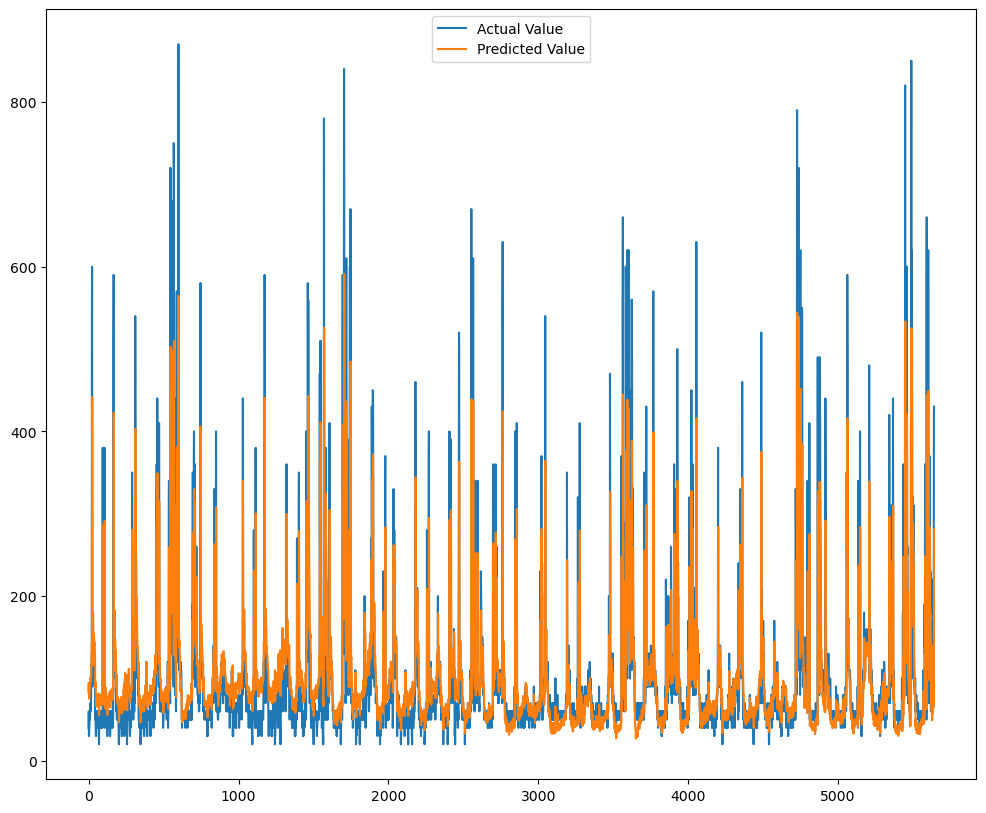

In [122]:
plt.figure(figsize=(12,10))
plt.plot(Final_df.Actual_Value, label = "Actual Value")
plt.plot(Final_df.Predicted_value, label = "Predicted Value")
plt.legend()
plt.show()